# Visualizing LEMON signals

Pretraining with lemon data crashes. It turnes out, for some subjects, one to two out of 7 aggregated time series have a much higher variance than the rest. Removing these subjects (around 7) results in successfull execution of pretraining. The file CV5Table_manualEdit does not contain the problematic subjects and is used for pretraining.

In [1]:
%matplotlib inline
import scipy
import matplotlib.pyplot as plt
import numpy as np
import os

data_path = '/vol/aimspace/users/bofe/TurBo/data/preTraining/sourceSignalsNormalized/OrthoAggSchaefer100_freq-all_epochLength-10_overlap-0/'
data_path_100 = '/vol/aimspace/users/bofe/TurBo/data/preTraining/sourceSignalsNormalized/Schaefer100_freq-all_epochLength-10_overlap-0/'

In [2]:

# List all files in the directory containing 'LEMON' in the filename
files_with_lemon = [f for f in os.listdir(data_path) if 'LEMON' in f]

iSegment = 0
logpow = []
logpowMax = []
for i, file in enumerate(files_with_lemon):
    dataSubject = scipy.io.loadmat(data_path + file)
    dataSubjectSegment = dataSubject['brainSignals']['trial'][0,0][0,iSegment]
    logpow.append(np.log(np.mean(np.var(dataSubjectSegment, axis=1))))
    logpowMax.append(np.log(np.max(np.var(dataSubjectSegment, axis=1))))


In [3]:
# plt.figure(figsize=[15,5])
# plt.plot(logpow)
filtered_files = [file for file, logpow in zip(files_with_lemon, logpow) if logpow > 15]
print(filtered_files)

# plt.plot(logpowMax)
filtered_files_max = [file for file, logpowmax in zip(files_with_lemon, logpowMax) if logpowmax > 15]
print(filtered_files_max)

print(f"fraction of individuals with bad signals: len(filtered_files_max)/len(files_with_lemon) {len(filtered_files_max)/len(files_with_lemon)}")


['sub-010024__set-LEMON__task-_ses-_AnalysisID_preTraining.mat', 'sub-010321__set-LEMON__task-_ses-_AnalysisID_preTraining.mat']
['sub-010029__set-LEMON__task-_ses-_AnalysisID_preTraining.mat', 'sub-010084__set-LEMON__task-_ses-_AnalysisID_preTraining.mat', 'sub-010035__set-LEMON__task-_ses-_AnalysisID_preTraining.mat', 'sub-010024__set-LEMON__task-_ses-_AnalysisID_preTraining.mat', 'sub-010071__set-LEMON__task-_ses-_AnalysisID_preTraining.mat', 'sub-010252__set-LEMON__task-_ses-_AnalysisID_preTraining.mat', 'sub-010321__set-LEMON__task-_ses-_AnalysisID_preTraining.mat']
fraction of individuals with bad signals: len(filtered_files_max)/len(files_with_lemon) 0.03398058252427184


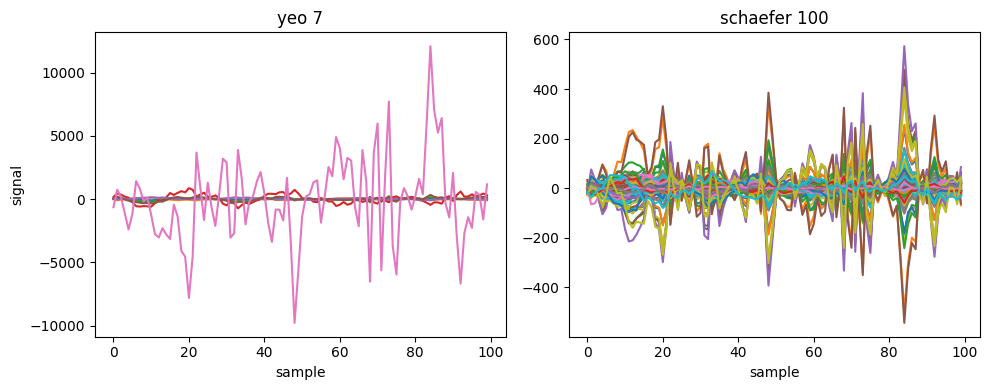

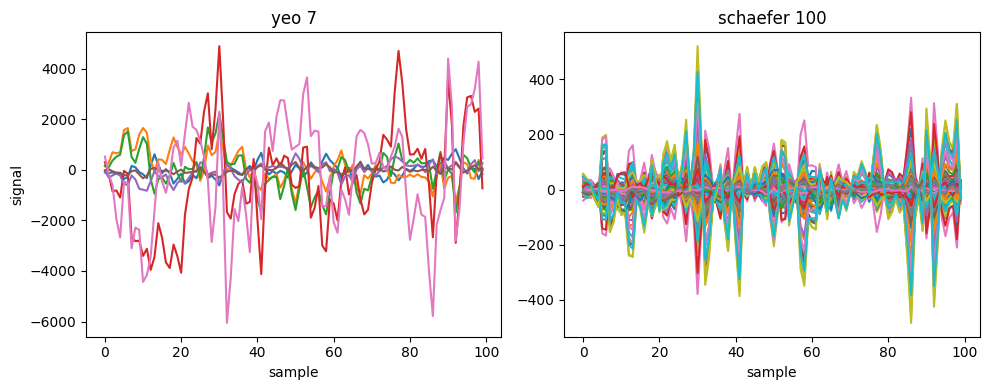

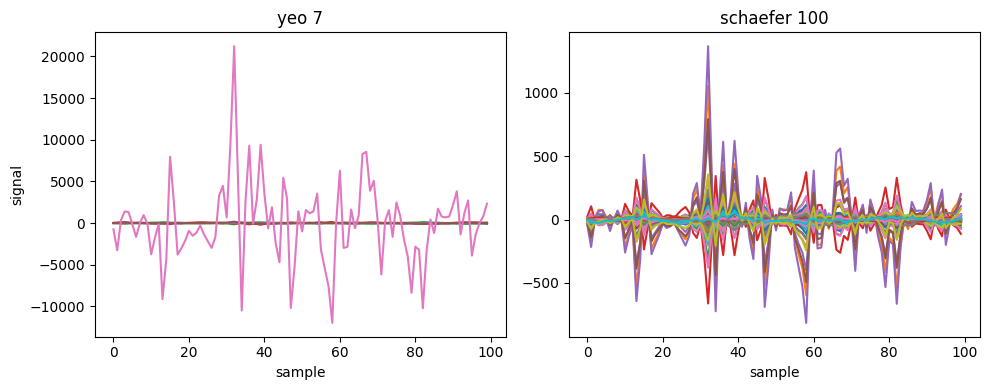

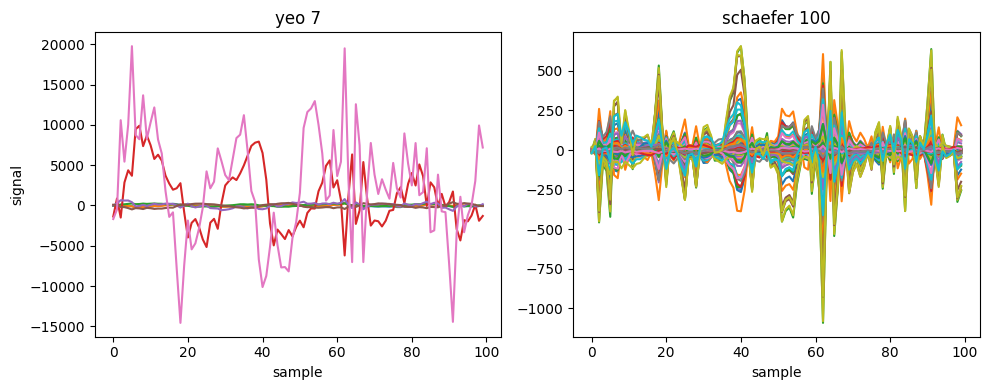

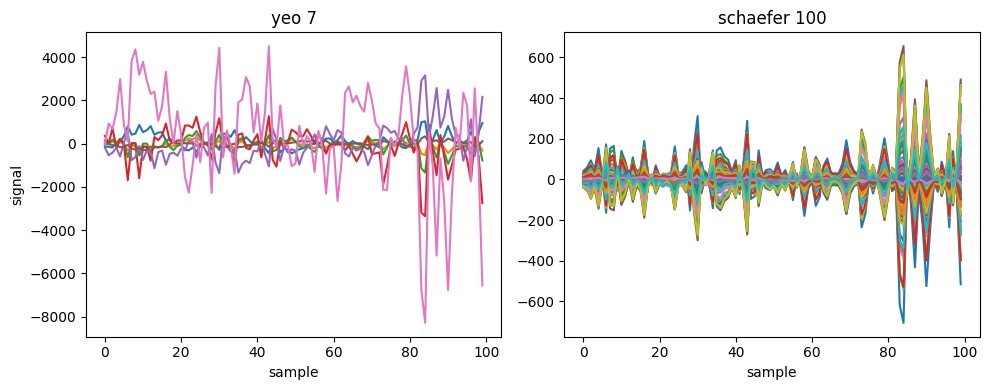

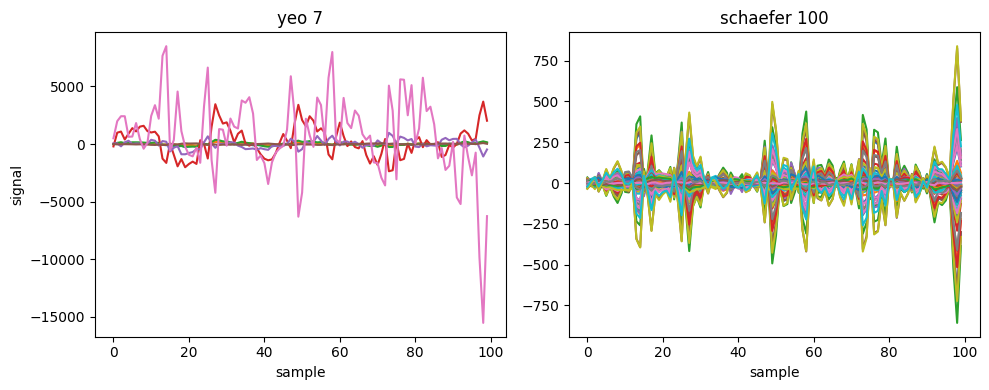

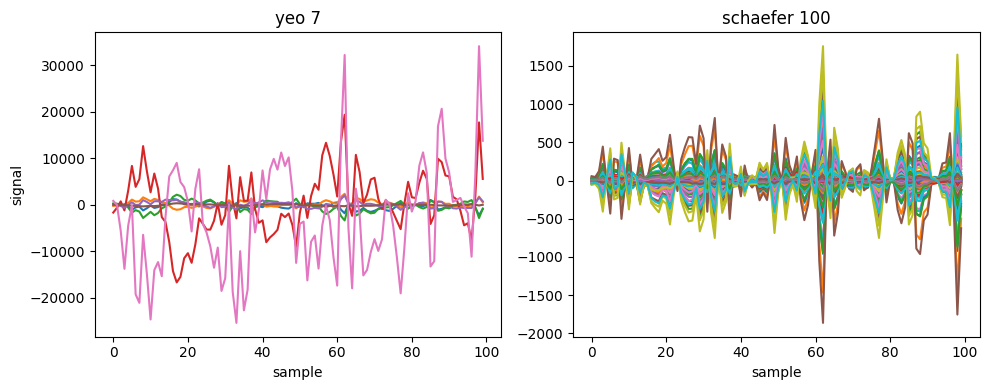

In [4]:

for i, file in enumerate(filtered_files_max):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

    # Load the MATLAB structure (.mat)
    dataSubject = scipy.io.loadmat(data_path + file)
    dataSubject100 = scipy.io.loadmat(data_path_100 + file)

    data = dataSubject['brainSignals']['trial'][0,0][0,iSegment]
    axes[0].plot(data.T[:100,:] + np.array(range(7))*0, linestyle='-')  
    axes[0].set_title('yeo 7')
    axes[0].set_xlabel('sample')
    axes[0].set_ylabel('signal')

    data = dataSubject100['brainSignals']['trial'][0,0][0,iSegment]
    axes[1].plot(data.T[:100,:] + np.array(range(100))*0, linestyle='-')  
    axes[1].set_title('schaefer 100')
    axes[1].set_xlabel('sample')

    # Display the plot
    plt.tight_layout()  
    plt.show()